<a href="https://colab.research.google.com/github/Vishal487/ML-Dog-Breed-Identification/blob/master/Dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

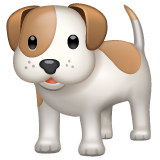

In [1]:
import tensorflow as tf
import tensorflow_hub as hub

# check versions
print('TF version: ', tf.__version__)
print('TF HUB version: ',hub.__version__)

# check for GPU availability
print('GPU', 'available' if tf.config.list_physical_devices('GPU') else 'not available :(')

TF version:  2.2.0
TF HUB version:  0.8.0
GPU available


In [2]:
# checkout the labels of our data

import pandas as pd
labels_csv = pd.read_csv('drive/My Drive/Dog Vision/dog breed identification/labels.csv')
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [3]:
labels_csv.describe()

,id,breed
count,10222,10222
unique,10222,120
top,4304c995750f369b71a7a366bd4d68d2,scottish_deerhound
freq,1,126


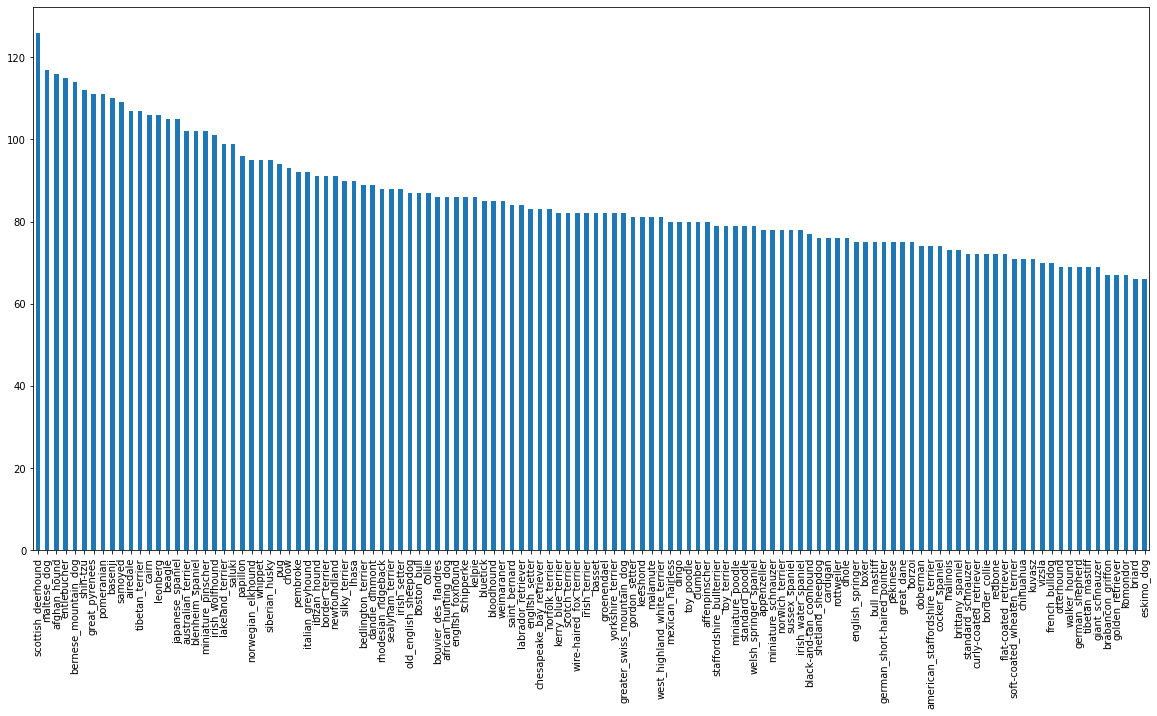

In [5]:
labels_csv['breed'].value_counts().plot.bar(figsize=(20,10));

In [6]:
from IPython.display import display, Image

In [7]:
filenames = ['drive/My Drive/Dog Vision/dog breed identification/train/' + fname + '.jpg' for fname in labels_csv['id']]
filenames[:10]

['drive/My Drive/Dog Vision/dog breed identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog Vision/dog breed identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog Vision/dog breed identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog Vision/dog breed identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog Vision/dog breed identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog Vision/dog breed identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog Vision/dog breed identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog Vision/dog breed identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog Vision/dog breed identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog Vision/dog breed identification/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [9]:
len(filenames),  len(os.listdir('drive/My Drive/Dog Vision/dog breed identification/train/'))

(10222, 10223)

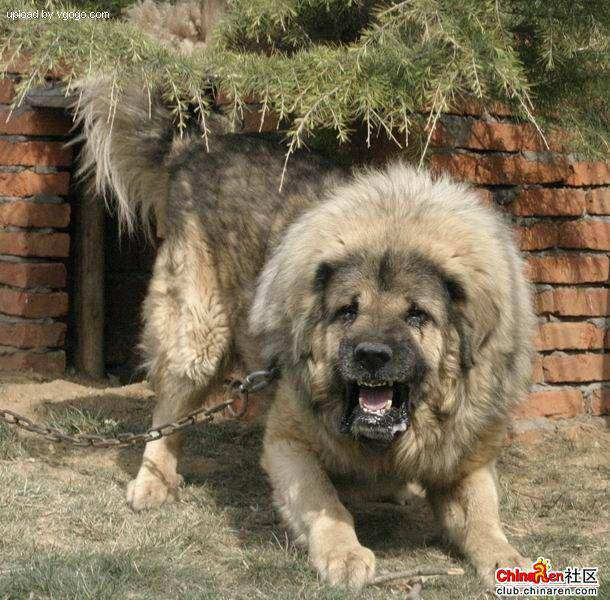

In [10]:
Image(filenames[9000])

Now we've got our image filepaths together, let's get the labels.
We'll take them from `labels_csv` and then turn into a `numpy array`

In [11]:
import numpy as np

labels = labels_csv['breed'].to_numpy()

# OR
# labels = np.array(labels)

labels[:10]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'bedlington_terrier', 'borzoi', 'basenji',
       'scottish_deerhound'], dtype=object)

In [12]:
if len(labels) == len(filenames):
  print('number of labels matches')
else:
  print('labels do not matches')

number of labels matches


Now we have to convert into numbers.
Making a boolean array

In [13]:
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [14]:
print(labels[0])
labels[0] == unique_breeds      # this is how we're going to make boolean array

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [15]:
boolean_labels = [label == np.array(unique_breeds) for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [16]:
# example : turninig a boolean array into integers

print(labels[0])  # original label
print(np.where(unique_breeds == labels[0])[0][0])      # index where labels occur
print(boolean_labels[0].argmax())       # index where label occur in boolean array
print(boolean_labels[0].astype(int))  # into integer form

boston_bull
19
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


## Creating our own validation set

In [17]:
# setup X, y variable

X = filenames
y = boolean_labels

In [18]:
# Set number of images to use for experimenting

NUM_IMAGES = 1000 #@param {type:'slider', min:1000, max:10000, step:1000}
NUM_IMAGES

1000

Now let's split our data into training and validation sets.

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)
len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [20]:
type(X_train[0])

str

In [21]:
X_train[:5], y_train[:2]

(['drive/My Drive/Dog Vision/dog breed identification/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/My Drive/Dog Vision/dog breed identification/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/My Drive/Dog Vision/dog breed identification/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/My Drive/Dog Vision/dog breed identification/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/My Drive/Dog Vision/dog breed identification/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,


## Preprocessing images (turning images into Tensors)

we need to convert our images from an array to tensors because deep learning model run faster on GPU and tensor allow to do the same.

To preprocess our images into Tensors we're going to write a function which does a few things:

1. Takes an image filename as input.
2. Uses TensorFlow to read the file and save it to a variable, image.
4. Turn our image (a jpeg file) into Tensors.
5. Resize the image to be of shape (224, 224).
6. Return the modified image.

In [22]:
from matplotlib.pyplot import imread
image = imread(filenames[42]) # read an image
image        # here it is array

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  53],
        [ 97,  88,  49],
        [120, 111,  72]]

In [23]:
image.shape

(257, 350, 3)

In [24]:
image.shape

(257, 350, 3)

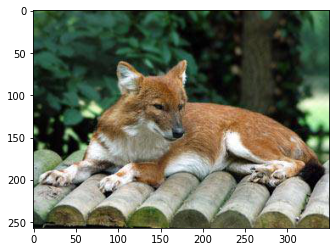

In [26]:
import matplotlib.pyplot as plt

plt.imshow(image);

In [27]:
# converting image into tensor

tf.constant(image)         # now it is converted into tensor

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  5

In [28]:
#  let's create a function

# define image size
IMG_SIZE = 224

def process_image(image_path, img_size=IMG_SIZE):
  """
  takes an image path and turns it into a Tensors
  """
  # read in image file
  image = tf.io.read_file(image_path) 

  # turn the jpeg image into numerical Tensor with 3 color channels (RGB)
  image = tf.image.decode_jpeg(image, channels=3)

  # convert the color channel values ffrom 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)

  # Resize the image to our desired size (224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  
  return image

## Creating data batches

In [29]:
# create a simple function to return a tuple (image, label)

def get_image_label(image_path, label):
  image = process_image(image_path)
  return image, label

In [30]:
# function for batch

# define batch size (32)
BATCH_SIZE = 32

def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
  Also accepts test data as input (no labels).
  """
  if test_data:
    print('creating TEST data batches...')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))    # only filepaths
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # if the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print('creating VALIDATION data batches...')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),  # filepaths
                                               tf.constant(y)))  # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:   # if the data is training dataset, we shuffle it
    print('creating TRAINING data batches...')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),  # filepaths
                                               tf.constant(y))) # labels
    # suffling 
    data = data.shuffle(buffer_size=len(X))

    # create tuples (image, label)
    data = data.map(get_image_label)

    # turn the data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [31]:
# creating training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

creating TRAINING data batches...
creating VALIDATION data batches...


In [32]:

# check out the different attribute of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing data batches

In [33]:
import matplotlib.pyplot as plt

# creating a function for viewing images in a data batch
def show_25_images(images, labels):
    """
    Display 25 images from a data batch
    """
    
    plt.figure(figsize=(10,10))
    for i in range(4):
        ax = plt.subplot(2, 2, i+1)
        plt.imshow(images[i])
        plt.title(unique_breeds[labels[i].argmax()])
        plt.axis('off')  # turn grid lines off

To make computation efficient, a batch is a tightly wound collection of Tensors.
So to view data in a batch, we've to wind it.
We can do so by calling the `as_numpy_iterator()` method on a data batch.
This will turn our a data batch into something which can be iterated over.

Passing an iterable to `next()` will return the next item in the iterator.

In our case, next will return a batch of 32 images and label pairs.

**Note**: Running the cell below and loading images may take a little while.

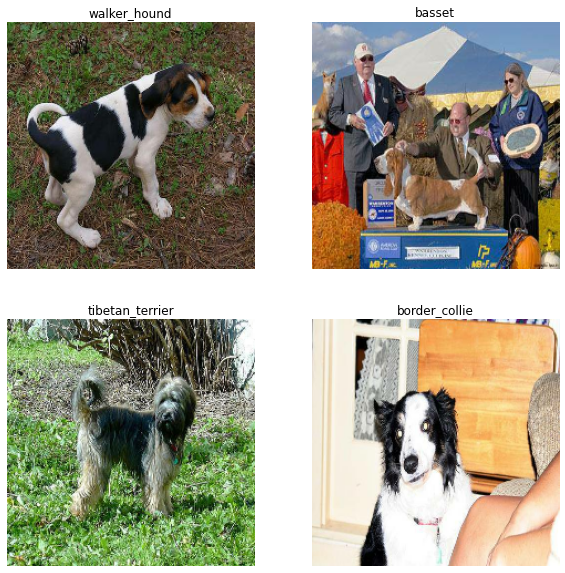

In [34]:
# Visualizing training images from the training data batch

train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels )

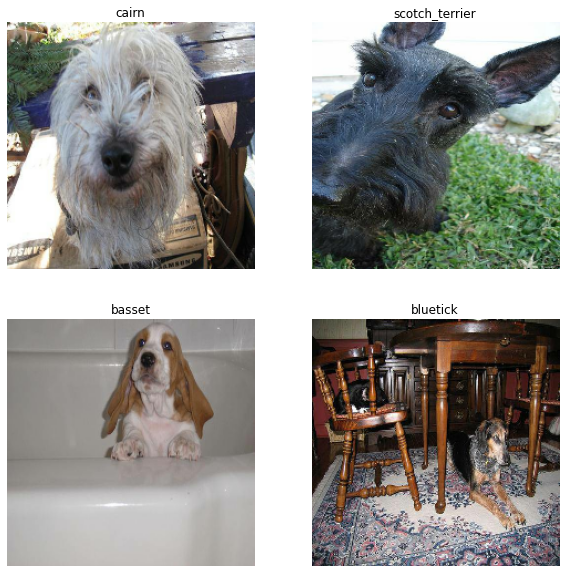

In [35]:
# visualizing validation images from the validationa data batch

val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Building a Model
Before we build a model, there are a few things we need to define:
* The `input shape` (our images shape, in the form of Tensors) to our model.
* The `output shape` (image labels, in the form of Tensors)of our model.
* The `URL` of the model we want to use from TensorFlow Hub- https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4



In [36]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]   # batch, height, width, color channels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

Now we've got our inputs, outputs and model ready to go. Let's put them together into a `Keras deep learning model`!

Knowing this, let's create a function which do following:
* Takes the input shape, output shape and the model we've chosen as parameter.
* Defines the layer in a Keras model in `sequential` fashion (i.e. do this, then this, then that).
* `Compiles` the model (says how it should be evaluated and improve).
* `Builds` the model (tells the model the input shape it'll be getting.
* Returns the model.

Refer-
https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


Which activation? Which loss function?
* Binary Classification (such as cat vs. dag)
   * Activation - Sigmoid
   *  loss - BinaryCrossentopy
* Multi-class classification (e.g. our problem)
   * Activation - Softmax
   * Loss - CategoricalCrossentropy

In [ ]:
# Create a function which builds a  Keras model

def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
    print('Building model with : ', MODEL_URL)

    # setup the model layers
    model = tf.keras.Sequential([
                hub.KerasLayer(MODEL_URL),     # Layer 1 (input layer)
                tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                                      activation='softmax')   # Layer 2 
    ])

    # compile the model
    model.compile(
        loss = tf.keras.losses.CategoricalCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=['accuracy']
    )

    # build the model
    model.build(INPUT_SHAPE)

    return model

In [ ]:
model = create_model()
model.summary()

Building model with :  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  5432713   
_________________________________________________________________
dense (Dense)                multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Creating callbacks 
callbacks are helper functions a model can use during training to do such thing as save its progress, check its progress or stop training early if a model stops improving.

We'll create two callbacks, one for `Tensorboards` which helps track our models progress and another for ealy stopping which prevents our model from tarining for too long.

### TensorBoard Callback

To setup a Tensorboard callback, we need to do 3 things:
1. Load the TensorBoard notebook extension.✅
2. Create a Tensbard callback which is able to save logs to directory and pass it to our model's `fit()` function.✅
3. Visualize our models training with the `%tensorboard` magic function (we'll do this after training).

refer- https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard

In [ ]:
# Load TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
import datetime

# create a function to build a tensorboard callback
def create_tensorboard_callback():
    # create a log directory for storing TensorBoard logs
    logdir = os.path.join('drive/My Drive/Dog Vision/dog breed identification/logs',
                          # Make it so the logs get tracked wheneve we run an experiment 
                          datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
    return tf.keras.callbacks.TensorBoard(logdir)

### Early stopping callback
Stop training when a monitored quantity has stopped improving.

refer- https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [ ]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                  patience=3)

## Training a model (on subset of data)
Our first model is only going to train on 1000 images, to make sure that everything is working.


In [ ]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

In [ ]:
# check for gpu avilability
print('available' if tf.config.list_physical_devices('GPU') else 'not available')

available


Let's create a function which trains a model.
* Create a model using `create_model()`
* Setup a TensorBoard using `create_tensorboard_callback()`.
* Call the `fit()` method on our model passing it the training data, validation data, no. of epochs to train for and the callbacks we'd like to use.
* Return the model.

In [ ]:
# Build a function to train and return a trained model

def train_model():
    """
    train a given model and returns the trained model
    """
    # create a model
    model = create_model()

    # create new TensorBoard session everytime we train a model
    tensorboard = create_tensorboard_callback()

    # Fit the model to the data passing it the callbacks we created
    model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
    
    # return the fitted model
    return model

**Note:** runnin gbelow cell may take long time

Actually first epoch take more time and then after it's quite fast.

In [ ]:
model = train_model()

Building model with :  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 406s 16s/step - loss: 4.6505 - accuracy: 0.1000 - val_loss: 3.5690 - val_accuracy: 0.2300
Epoch 2/100
25/25 [==============================] - 5s 182ms/step - loss: 1.6334 - accuracy: 0.6913 - val_loss: 2.2650 - val_accuracy: 0.4700
Epoch 3/100
25/25 [==============================] - 5s 195ms/step - loss: 0.5497 - accuracy: 0.9450 - val_loss: 1.7384 - val_accuracy: 0.5800
Epoch 4/100
25/25 [==============================] - 5s 196ms/step - loss: 0.2524 - accuracy: 0.9850 - val_loss: 1.5288 - val_accuracy: 0.6250
Epoch 5/100
25/25 [==============================] - 4s 179ms/step - loss: 0.1440 - accuracy: 0.9962 - val_loss: 1.4601 - val_accuracy: 0.6200
Epoch 6/100
25/25 [==============================] - 5s 184ms/step - loss: 0.1002 - accuracy: 0.9987 - val_loss: 1.3968 - val_accuracy: 0.6300
Epoch 7/100
25/25 [============================

**Note:** Overfitting to begin with is a good thing, it means our model is learning something.

**Question:** What are the different ways to prevent model overfitting in deep learning neural networks?

### Checking the TensorBoard logs
Teh Tensorboard magic function (`%tensorboard`) will accesss the logs directory we created earlier and visualize its contents.

In [ ]:
%tensorboard --logdir drive/My\ Drive/Dog\ Vision/dog\ breed\ identification/logs --host=127.0.0.1 --inspect

ERROR: Failed to launch TensorBoard (exited with 0).
Contents of stdout:
Processing event files... (this can take a few minutes)

Found event files in:
drive/My Drive/Dog Vision/dog breed identification/logs/20200403-042925/train
drive/My Drive/Dog Vision/dog breed identification/logs/20200403-042925/validation
drive/My Drive/Dog Vision/dog breed identification/logs/20200403-051704/train
drive/My Drive/Dog Vision/dog breed identification/logs/20200403-051704/validation
drive/My Drive/Dog Vision/dog breed identification/logs/20200403-135609/train
drive/My Drive/Dog Vision/dog breed identification/logs/20200403-135609/validation
drive/My Drive/Dog Vision/dog breed identification/logs/20200403-152046/train
drive/My Drive/Dog Vision/dog breed identification/logs/20200403-152046/validation
drive/My Drive/Dog Vision/dog breed identification/logs/20200404-045108/train
drive/My Drive/Dog Vision/dog breed identification/logs/20200404-045108/validation

These tags are in drive/My Drive/Dog Visio

In [ ]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [ ]:
predictions = model.predict(val_data, verbose=True)

7/7 [==============================] - 1s 115ms/step


In [ ]:
predictions

array([[5.40308596e-04, 1.12939444e-04, 2.72969395e-04, ...,
        1.74136760e-04, 8.58370367e-06, 4.38177434e-04],
       [1.93490868e-03, 5.49318409e-03, 6.40779082e-03, ...,
        1.16112555e-04, 7.61749549e-03, 3.27001500e-04],
       [3.44937325e-06, 1.09720104e-05, 1.65765425e-06, ...,
        2.80291147e-06, 2.35862426e-05, 3.37978527e-05],
       ...,
       [1.64079245e-06, 2.03034906e-05, 3.39377220e-06, ...,
        6.10877260e-06, 4.98700247e-05, 1.70662126e-04],
       [1.66032510e-03, 7.22118712e-05, 7.79432085e-05, ...,
        3.66541899e-05, 7.79575566e-05, 5.66715375e-03],
       [1.50967782e-04, 4.01524740e-05, 9.16045319e-05, ...,
        1.37675705e-03, 2.82070646e-03, 7.86890996e-06]], dtype=float32)

In [ ]:
predictions.shape

(200, 120)

In [ ]:
# first prediction

print(predictions[0])
print(f"Max value (probability of prediction): {np.max(predictions[0])}")  # the max pobability value predicted by our model
print(f"Sum: {np.sum(predictions[0])}")  # bcz we used softmax activation this should be close to 1
print(f"Max index: {np.argmax(predictions[0])}")  # the index of where the max. value occur
print(f"Predicted label: {unique_breeds[np.argmax(predictions[0])]}")   # predicted label

[5.40308596e-04 1.12939444e-04 2.72969395e-04 1.13942653e-04
 9.43439300e-05 1.02780523e-05 3.41327116e-02 2.78121443e-04
 3.35994642e-04 3.41682317e-04 4.83219192e-05 4.30672371e-05
 4.37335184e-05 3.13451965e-05 2.14003419e-04 1.63971970e-04
 7.15201240e-05 2.36325841e-02 2.92304117e-06 1.53522888e-05
 1.42947189e-04 1.97531219e-04 6.62078128e-06 1.09988621e-04
 4.14030619e-05 1.92798703e-04 6.61611497e-01 3.59790793e-05
 7.44174118e-04 1.22802550e-04 5.13212544e-05 3.61314567e-04
 5.20144124e-04 1.95735774e-05 1.71588166e-04 1.52636636e-02
 3.71128749e-06 3.62984283e-04 2.16225471e-05 1.08310356e-04
 1.47135637e-03 4.99077214e-05 8.36121853e-06 2.53398670e-04
 4.90746424e-05 1.65914331e-04 3.23063578e-05 2.80104869e-05
 4.51784086e-04 6.99833327e-05 3.26709378e-05 2.43326867e-05
 3.86208878e-04 2.49571567e-05 9.33137344e-05 2.23954448e-05
 2.92573714e-05 4.64406097e-03 3.32513533e-04 5.79884648e-02
 1.55145215e-04 3.25587916e-06 3.86690395e-03 3.02495960e-06
 1.78210379e-04 1.235890

**Note:** Prediction probabilities are also known as confidence labels.

Let's build a little function to convert prediction probabilities into predicted labels.

In [ ]:
def get_pred_label(prediction_probabilities):
    """
    turns an array of prediction probabilities into a label
    """

    return unique_breeds[np.argmax(prediction_probabilities)]

# get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[0])
pred_label

'cairn'

### Unbatchify

Since our validation data (`val_data`) is in batch form, to get a list of validation images and labels, we'll have to unbatch it (using `unbatch()`) and then turn it into an iterator using `as_numpy_iterator()`.

In [ ]:
def unbatchify(data):
    """
    takes a batched dataset of (image, label) Tensors and returns separate
    arrays of image and labels.
    """

    images = []
    labels = []
    # loop through batched data
    for image, label in data.unbatch().as_numpy_iterator():
        images.append(image)
        labels.append(unique_breeds[np.argmax(label)])
    return images, labels

# unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

Now we've got ways to get:
* Prediction labels
* Validation labels (truth labels)
* validation images

Let's make some function to more visualize.

The function do the following:
* Take an array of prediction probabilities, an array of truth labels, an arrray of images and an integer.
* Convert the prediction probabilities to a predicted label.
* Plot the predicted label, its predicted probability, the truth label and target image on a single plot.

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
    """
    view the prediction, ground truth label and image for sample n
    """

    pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

    # get the predicted label
    pred_label = get_pred_label(pred_prob)

    # plot image 
    plt.imshow(image)
    plt.xticks([])   # remove x ticks
    plt.yticks([])   # remove y ticks

    # change the color of the title depending on whether the prediction is correct
    if pred_label == true_label:
        color = 'green'
    else:
        color = 'red'

    plt.title("{} {:2.0f}% ({})".format(pred_label,
                                        np.max(pred_prob)*100,
                                        true_label),
              color=color)
    

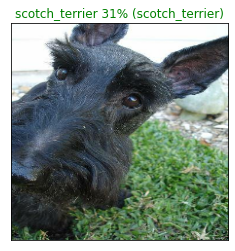

In [ ]:
# view an example prediction, original image and truth label
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images)

Let's see what our model predicted for other breeds instead of just seeing maximum one.

Let's create a function to demonstrate. The function will:
* Take an input of a prediction probabilities array, a ground truth labels array and an integer.
* Find the predicted label using `get_pred_label()`.
* Find the top 10:
  * Prediction probabilities indexes.
  * Prediction probabilities values.
  * Prediction labels.
* Plot the top 10 prediction probabilities values and labels, coloring the true labels green.

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
    """
    plots the top 10 highest prediction confidence along with the truth label
    for sample n
    """

    pred_prob, true_label = prediction_probabilities[n], labels[n]

    # get the predicted label
    pred_label = get_pred_label(pred_prob)

    # find the top 10 prediction confidences indices
    top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]

    # top 10 values
    top_10_pred_values = pred_prob[top_10_pred_indexes]

    # top 10 prediction labels
    top_10_pred_labels = unique_breeds[top_10_pred_indexes]

    # plotting 
    top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                       top_10_pred_values,
                       color='grey')
    plt.xticks(np.arange(len(top_10_pred_labels)),
               labels=top_10_pred_labels,
               rotation='vertical')
    
    # change the color of true model
    if np.isin(true_label, top_10_pred_labels):
        top_plot[np.argmax(top_10_pred_labels == true_label)].set_color('green')
    else:
        pass

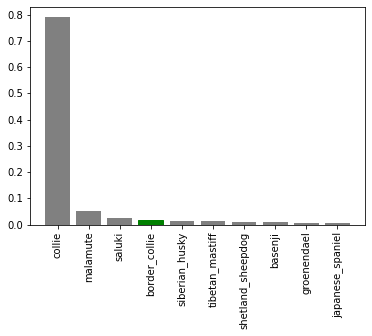

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

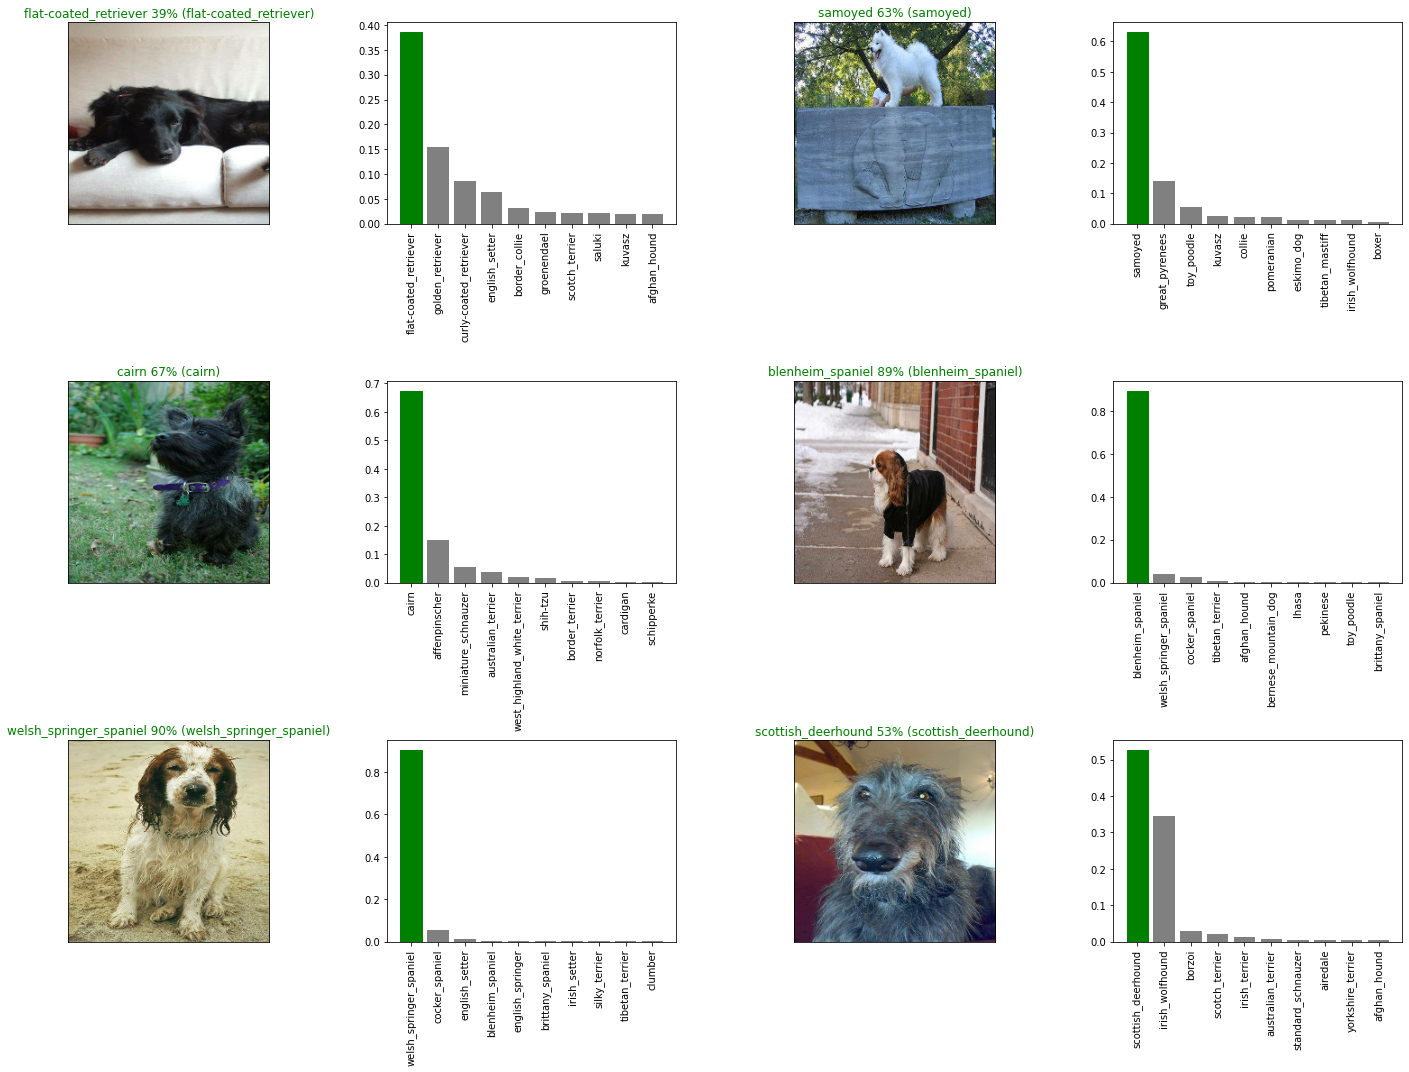

In [ ]:
# Let's plot a few predictions and their different values

i_multiplier = 20
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_pred(prediction_probabilities=predictions,
              labels=val_labels,
              images=val_images,
              n=i+i_multiplier)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_pred_conf(prediction_probabilities=predictions,
                   labels=val_labels,
                   n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

## Saving and reloading a model

In [ ]:
def save_model(model, suffix=None):     # suffix is just for communicating
    """
    saves a given model in a models directory and apppendsa suffix (a str)
    for clarity
    """
    # create model directory with current time
    modeldir = os.path.join('drive/My Drive/Dog Vision/dog breed identification/models',
                            datetime.datetime.now().strftime('%Y%m%d-%H%M%s'))
    model_path = modeldir + '-' + suffix + '.h5'
    print(f"Saving model to: {model_path}...")
    model.save(model_path)
    return model_path

In [ ]:
def load_model(model_path):
    """
    loads a saved model from a specified path.
    """
    print(f'loading saved model from: {model_path}...')
    model = tf.keras.models.load_model(model_path,
                                       custom_objects={'KerasLayer':hub.KerasLayer})
    return model

In [ ]:
save_model(model, suffix='1000-images-Adam')

Saving model to: drive/My Drive/Dog Vision/dog breed identification/models/20200404-05041585976690-1000-images-Adam.h5...


'drive/My Drive/Dog Vision/dog breed identification/models/20200404-05041585976690-1000-images-Adam.h5'

In [ ]:
# Load our model trained on 1000 images
model_1000_images = load_model('drive/My Drive/Dog Vision/dog breed identification/models/20200403-15561585929385-1000-images-Adam.h5')

# we can ignore warnings!!!

loading saved model from: drive/My Drive/Dog Vision/dog breed identification/models/20200403-15561585929385-1000-images-Adam.h5...


Compare the two models : original one and loaded one

In [ ]:
model.evaluate(val_data)

7/7 [==============================] - 1s 101ms/step - loss: 1.2458 - accuracy: 0.6550


[1.2457619905471802, 0.6549999713897705]

In [ ]:
model_1000_images.evaluate(val_data)

7/7 [==============================] - 1s 110ms/step - loss: 1.1990 - accuracy: 0.6550


[1.1990219354629517, 0.6549999713897705]

## Training a model (on full data)

In [ ]:
len(X), len(y)

(10222, 10222)

In [ ]:
X[:10]

['drive/My Drive/Dog Vision/dog breed identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog Vision/dog breed identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog Vision/dog breed identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog Vision/dog breed identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog Vision/dog breed identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog Vision/dog breed identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog Vision/dog breed identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog Vision/dog breed identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog Vision/dog breed identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog Vision/dog breed identification/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
len(X_train),  len(y_train)

(800, 800)

In [ ]:
y[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
# create a databatch with full dataset
full_data = create_data_batches(X, y)

creating TRAINING data batches...


In [ ]:
full_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [ ]:
# create a model for full dataset

full_model = create_model()

Building model with :  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [ ]:
# create full model callbackes

full_model_tensorboard = create_tensorboard_callback()

# no validation set when training on fulll data, so we can't monitor validationaccuracy

full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy',
                                                             patience=3)

**Note:** Running the cell below will take a little while
(maybe `upto 30 minutes` for the first epochs) bcz the GPU we're using in the runtime has to load all of the images into memory.

In [ ]:
# fit the full model to the full data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 4044s 13s/step - loss: 1.3266 - accuracy: 0.6708
Epoch 2/100
320/320 [==============================] - 50s 155ms/step - loss: 0.4022 - accuracy: 0.8818
Epoch 3/100
320/320 [==============================] - 49s 153ms/step - loss: 0.2368 - accuracy: 0.9330
Epoch 4/100
320/320 [==============================] - 49s 153ms/step - loss: 0.1507 - accuracy: 0.9647
Epoch 5/100
320/320 [==============================] - 48s 151ms/step - loss: 0.1046 - accuracy: 0.9801
Epoch 6/100
320/320 [==============================] - 49s 153ms/step - loss: 0.0760 - accuracy: 0.9864
Epoch 7/100
320/320 [==============================] - 47s 148ms/step - loss: 0.0585 - accuracy: 0.9921
Epoch 8/100
320/320 [==============================] - 47s 147ms/step - loss: 0.0457 - accuracy: 0.9954
Epoch 9/100
320/320 [==============================] - 47s 147ms/step - loss: 0.0369 - accuracy: 0.9965
Epoch 10/100
320/320 [==============================] - 47s 146m

In [ ]:
full_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_3 (KerasLayer)   multiple                  5432713   
_________________________________________________________________
dense_3 (Dense)              multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Save and Reload full model

In [ ]:
# save our full model

save_model(full_model, suffix='full-model')

Saving model to: drive/My Drive/Dog Vision/dog breed identification/models/20200404-06571585983474-full-model.h5...


'drive/My Drive/Dog Vision/dog breed identification/models/20200404-06571585983474-full-model.h5'

In [ ]:
# reload saved full model

loaded_full_model = load_model('drive/My Drive/Dog Vision/dog breed identification/models/20200404-06571585983474-full-model.h5')

loading saved model from: drive/My Drive/Dog Vision/dog breed identification/models/20200404-06571585983474-full-model.h5...


### Making predictions on the test dataset
Since our model has been trained on images in the form of Tensor batches, to make predictions on the test data, we'll have to get it into the same format.

Luckily we created `create_data_batches()` earlier which can take a list of filenames as input and convert them into Tensor batches.

To make predictions on the test data, we'll:

* Get the test image filenames.
* Convert the filenames into test data batches using create_data_batches() and setting the test_data parameter to True (since there are no labels with the test images).
* Make a predictions array by passing the test data batches to the predict() function.

In [ ]:
test_path = 'drive/My Drive/Dog Vision/dog breed identification/test/'
test_filenames = [test_path + fname for fname in os.listdir(test_path)]

test_filenames[:10]

['drive/My Drive/Dog Vision/dog breed identification/test/f53aa47b4676b1f135ac2eeeee01db9b.jpg',
 'drive/My Drive/Dog Vision/dog breed identification/test/f569c5b12fae4ca37d376d21bc05f2b3.jpg',
 'drive/My Drive/Dog Vision/dog breed identification/test/f540547111a9b6bda288b694a5536702.jpg',
 'drive/My Drive/Dog Vision/dog breed identification/test/f56b3708592637432ac53d7f0684dfa8.jpg',
 'drive/My Drive/Dog Vision/dog breed identification/test/f56b4140707da82fe91cb9e5df4ce68c.jpg',
 'drive/My Drive/Dog Vision/dog breed identification/test/f5787e3574a4af6a19ff825cf0c32366.jpg',
 'drive/My Drive/Dog Vision/dog breed identification/test/f574f558d78db4e616e91f5dd5347409.jpg',
 'drive/My Drive/Dog Vision/dog breed identification/test/f575720280425098d6faca42cff69a36.jpg',
 'drive/My Drive/Dog Vision/dog breed identification/test/f592d6ca12a9d99c18f26260c3eb148a.jpg',
 'drive/My Drive/Dog Vision/dog breed identification/test/f57f8ce3fe1d928828e37a9bd78574d9.jpg']

In [ ]:
len(test_filenames)

10371

In [ ]:

# create test data batch

test_data = create_data_batches(test_filenames, test_data=True)

creating TEST data batches...


**Note:** Since there are 10,000+ test images, making predictions could take a while, even on a GPU. So beware running the cell below may take up to an hour.

In [ ]:
# make predictions on test data batch using the loaded full model

test_predictions = loaded_full_model.predict(test_data,
                                             verbose=1) 

325/325 [==============================] - 5386s 17s/step


In [ ]:
test_predictions[:10]

array([[1.79828721e-08, 5.02333418e-13, 1.53525603e-14, ...,
        4.01997392e-13, 5.96555072e-09, 3.59538777e-09],
       [1.15432222e-07, 9.76809345e-12, 2.73525536e-10, ...,
        5.33754640e-09, 1.48313219e-07, 7.48032107e-08],
       [1.10505162e-07, 1.04834726e-07, 2.21921042e-08, ...,
        9.41770306e-09, 7.69844490e-08, 1.03543694e-04],
       ...,
       [7.64863921e-13, 3.70036873e-13, 1.55626900e-11, ...,
        8.96474561e-12, 1.31788511e-10, 8.29572173e-07],
       [1.00489173e-09, 6.48076731e-11, 4.88656724e-08, ...,
        1.61290382e-12, 1.53191002e-11, 3.85098620e-11],
       [4.40392895e-08, 4.28103126e-12, 3.36092943e-13, ...,
        1.17437925e-14, 1.58823735e-11, 3.51104631e-11]], dtype=float32)

Preparing test dataset predictions for Kaggle

It looks like they want the models output probabilities each for label along with the image ID's.

To get the data in this format, we'll:

* Create a pandas DataFrame with an ID column as well as a column for each dog breed.
* Add data to the ID column by extracting the test image ID's from their filepaths.
Add data (the prediction probabilities) to each of the dog breed columns using the unique_breeds list and the test_predictions list.
* Export the DataFrame as a CSV to submit it to Kaggle.

In [ ]:
# create pandas dataframe with empty columns

preds_df = pd.DataFrame(columns=['id'] + list(unique_breeds))
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier


In [ ]:
preds_df.shape

(0, 121)

In [ ]:
# append test image ID's to prediction DataFrame

test_path = 'drive/My Drive/Dog Vision/dog breed identification/test/'
preds_df['id'] = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,f53aa47b4676b1f135ac2eeeee01db9b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,f569c5b12fae4ca37d376d21bc05f2b3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,f540547111a9b6bda288b694a5536702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f56b3708592637432ac53d7f0684dfa8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,f56b4140707da82fe91cb9e5df4ce68c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# add the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,f53aa47b4676b1f135ac2eeeee01db9b,1.79829e-08,5.02333e-13,1.53526e-14,7.53909e-13,6.90754e-14,2.14972e-10,8.94498e-11,1.25528e-13,8.16475e-18,1.25375e-14,1.3739e-13,7.04375e-14,4.20882e-11,7.13192e-12,5.07363e-11,4.11687e-12,2.45026e-11,4.04972e-05,2.59495e-15,7.96695e-13,6.41777e-15,3.46983e-11,0.999959,3.79546e-11,1.95755e-13,9.34967e-12,7.30039e-15,2.65954e-13,8.75755e-13,3.17538e-10,7.01406e-13,9.26047e-14,8.8763e-15,5.75997e-15,1.00389e-14,8.28766e-13,4.04198e-12,3.02349e-11,1.02996e-10,...,5.24317e-13,1.89727e-09,3.90521e-17,1.17113e-13,2.82542e-09,3.22753e-11,3.27145e-13,5.09907e-11,1.38729e-10,1.67526e-10,2.54773e-11,2.95105e-12,1.85184e-14,1.0765e-17,3.16581e-15,1.611e-10,3.2512e-14,8.05547e-14,1.61995e-09,3.76505e-15,1.30776e-13,1.52956e-14,2.65737e-08,8.18763e-13,1.261e-08,5.52181e-13,6.97039e-09,4.77287e-11,4.51659e-13,6.8224e-14,3.79118e-12,2.12636e-09,1.08085e-11,2.49131e-13,5.20046e-16,2.18268e-10,9.00745e-13,4.01997e-13,5.96555e-09,3.59539e-09
1,f569c5b12fae4ca37d376d21bc05f2b3,1.15432e-07,9.76809e-12,2.73526e-10,2.01755e-09,1.9779e-09,6.7003e-12,5.67887e-10,4.49441e-08,4.70124e-11,2.96766e-08,9.05488e-09,3.17018e-11,3.32923e-11,8.12796e-13,2.25399e-13,1.9104e-09,5.44564e-09,1.42155e-10,1.45524e-11,0.98786,4.5529e-11,4.27425e-10,4.58059e-09,7.96963e-12,5.19265e-13,1.11612e-12,2.91524e-08,1.42272e-08,7.30221e-14,0.00126687,1.12458e-11,7.94396e-14,6.98834e-12,3.17169e-09,9.47557e-10,6.68982e-13,2.7006e-12,2.02496e-11,3.22627e-07,...,1.13457e-10,6.28735e-12,2.62137e-09,2.9471e-14,5.67488e-08,1.51512e-08,9.50239e-12,2.03533e-09,6.11636e-08,6.17338e-09,3.45474e-14,7.36321e-13,2.21663e-12,7.79295e-11,8.20624e-11,6.51207e-08,2.67853e-09,9.18987e-11,1.90235e-11,2.7068e-11,3.27736e-06,7.44605e-10,2.04825e-08,6.16045e-12,6.9833e-09,3.16518e-12,6.54131e-11,1.82445e-10,3.88561e-12,3.43762e-11,4.32828e-05,0.00146969,9.81199e-12,5.19061e-12,1.5446e-08,1.75755e-11,7.01875e-08,5.33755e-09,1.48313e-07,7.48032e-08
2,f540547111a9b6bda288b694a5536702,1.10505e-07,1.04835e-07,2.21921e-08,8.48329e-08,2.67481e-05,1.28195e-09,9.14051e-07,1.39206e-08,8.97626e-08,2.03235e-09,8.11223e-11,2.86734e-09,2.04184e-06,1.06754e-05,2.3227e-05,1.56527e-06,3.79993e-07,3.93124e-07,1.42197e-09,2.85835e-06,1.6056e-07,1.36907e-06,0.000474191,9.02337e-05,1.74587e-08,0.477594,1.34223e-07,3.24446e-09,6.04303e-08,3.12152e-09,2.51757e-07,1.84244e-05,7.58508e-06,1.42947e-06,4.65362e-12,1.53885e-07,5.35027e-11,2.73114e-08,9.91507e-09,...,1.31231e-08,2.87796e-06,1.16058e-06,1.65081e-07,3.65596e-06,0.000407237,6.97091e-11,1.44265e-07,0.0264497,7.73023e-08,1.20823e-07,1.87837e-05,3.97795e-05,3.22268e-09,2.19142e-10,1.75822e-07,3.1586e-09,1.5658e-08,5.5206e-09,4.07678e-08,0.0065909,6.0044e-08,0.48734,3.45592e-07,1.69328e-05,1.45698e-08,1.50913e-07,2.80158e-06,6.4447e-05,7.13326e-05,3.03752e-08,1.18767e-07,6.08638e-10,2.65235e-08,9.91382e-08,3.53093e-07,3.45441e-08,9.4177e-09,

In [ ]:
preds_df.to_csv('drive/My Drive/Dog Vision/dog breed identification/full_submission_1_mobilenetV2_adan.csv',
                index=False)

THANK YOU!!!